# Simple regression analysis (by moriitkys 2020/04)
実装は【キカガク流】人工知能・機械学習　脱ブラックボックス講座-初級編-　を参考にしています。  
初心者の方は、pandasの使い方や単回帰分析の解説など、講座の受講をおすすめします。  
【キカガク流】人工知能・機械学習　脱ブラックボックス講座-初級編-  
https://www.udemy.com/course/kikagaku_blackbox_1/learn/lecture/8258758#overview

データセットはsklearnで取得できるボストンの地域別住宅価格のデータセットを用いました。部屋の数RMをxとして家賃Priceを予測します。

## 環境
Anaconda3  
pandas==0.23.0  
scikit-learn==0.19.1  
seaborn==0.8.1  
tensorflow-gpu==1.5.0  
Keras==2.1.5  
以上で何か足りないものがあればpipでインストールしてください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import seaborn as sns
%matplotlib inline

# You should decide how many kinds of input data to use
## 以下のsが入力データの種類の数、今回は単回帰なので1

In [2]:
s = 1

non centering description


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


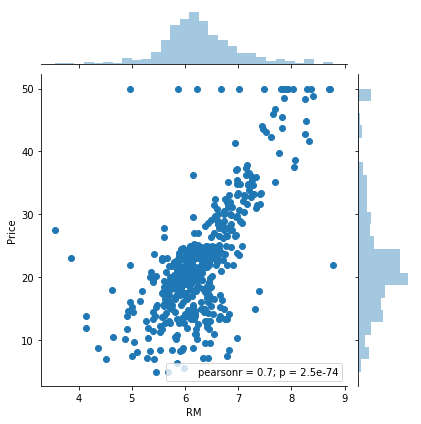

In [3]:
bsdata = load_boston()
df = pd.DataFrame(bsdata.data, columns=bsdata.feature_names)
df['Price'] = bsdata.target
sns.jointplot('RM', 'Price', data=df)

# Non centering
print("non centering description")
df.describe()

In [4]:
# Centering
print("centering description")
df_c = df-df.mean()
x = df_c['RM']
y = df_c['Price']

df_c.describe()

centering description


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-4.388233e-17,2.076161e-14,-2.800395e-14,-1.189760e-16,2.641716e-16,-8.141050e-15,-3.552714e-14,1.720187e-15,4.683123e-15,3.370163e-13,-2.348582e-14,7.632296e-13,-3.565001e-15,-2.570100e-14
std,8.596783e+00,2.332245e+01,6.860353e+00,2.539940e-01,1.158777e-01,7.026171e-01,2.814886e+01,2.105710e+00,8.707259e+00,1.685371e+02,2.164946e+00,9.129486e+01,7.141062e+00,9.197104e+00
min,-3.587441e+00,-1.136364e+01,-1.067678e+01,-6.916996e-02,-1.696951e-01,-2.723634e+00,-6.567490e+01,-2.665443e+00,-8.549407e+00,-2.212372e+02,-5.855534e+00,-3.563540e+02,-1.092306e+01,-1.753281e+01
25%,-3.511716e+00,-1.136364e+01,-5.946779e+00,-6.916996e-02,-1.056951e-01,-3.991344e-01,-2.354990e+01,-1.694868e+00,-5.549407e+00,-1.292372e+02,-1.055534e+00,1.870347e+01,-5.703063e+00,-5.507806e+00
50%,-3.337251e+00,-1.136364e+01,-1.446779e+00,-6.916996e-02,-1.669506e-02,-7.613439e-02,8.925099e+00,-5.875927e-01,-4.549407e+00,-7.823715e+01,5.944664e-01,3.476597e+01,-1.293063e+00,-1.332806e+00
75%,5.366179e-02,1.136364e+00,6.963221e+00,-6.916996e-02,6.930494e-02,3.388656e-01,2.550010e+01,1.393382e+00,1.445059e+01,2.577628e+02,1.744466e+00,3.955097e+01,4.301937e+00,2.467194e+00
max,8.538244e+01,8.863636e+01,1.660322e+01,9.308300e-01,3.163049e-01,2.495366e+00,3.142510e+01,8.331457e+00,1.445059e+01,3.027628e+02,3.544466e+00,4.022597e+01,2.531694e+01,2.746719e+01


## Calculate parameter a
$$a=\frac{\sum_{n=1}^{N} x_{n} y_{n}}{\sum_{n=1}^{N} x_{n}^{2}}$$

a= 9.102108981180303


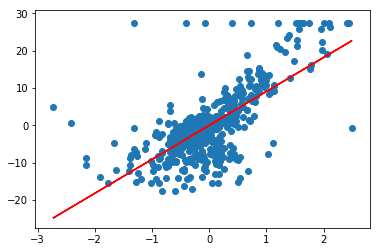

In [5]:
xx = x*x
xy = x*y
a = xy.mean()/xx.mean()
print("a=", a)
plt.plot(x,a*x, label='y_hat', color='red')
plt.scatter(x,y, label='y')
plt.show()

In [6]:
# Prediction
# new_x >= 3.56 and new_x < 8.78
new_x = 7
predict_y = a*(new_x - df.mean()['RM']) + df.mean()['Price'] 
print(predict_y)

29.04414209182355


上記のPredictionの結果ですが、Priceの平均が約22、マックスで50なので妥当な値に推測できているのではないでしょうか。

# Keras implementation of simple regression analysis
# Kerasで単回帰分析　
上のsで数を変えてcsvの入力データ種類のRM以外も含めると重回帰分析ができます。

In [7]:
import numpy as np
import pandas
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Input Data データの読み込み
df = pd.DataFrame(bsdata.data, columns=bsdata.feature_names)
df['Price'] = bsdata.target
dataset_mean = df.mean()
# Centering
df_c = df-dataset_mean

x = df_c['RM']
y = df_c['Price']

x_normalized = (x - min(x))/(max(x)-min(x))
y_normalized = (y - min(y))/(max(y)-min(y))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/50
506/506 [==============================] - 2s 5ms/step - loss: 0.1855 - mean_absolute_error: 0.3565
Epoch 2/50
506/506 [==============================] - 0s 85us/step - loss: 0.0265 - mean_absolute_error: 0.1161
Epoch 3/50
506/506 [==============================] - 0s 89us/step - loss: 0.0237 - mean_absolute_error: 0.1088
Epoch 4/50
506/506 [==============================] - 0s 85us/step - loss: 0.0232 - mean_absolute_error: 0.1058
Epoch 5/50
506/506 [==============================] - 0s 85us/step - loss: 0.0232 - mean_absolute_error: 0.1061
Epoch 6/50
506/506 [==============================] - 0s 85us/step - loss: 0.0232 - mean_absolute_error: 0.1063
Epoch 7/50
506/506 [==============================] - 0s 85us/step - loss: 0.0232 - mean_absolute_error: 0.1060
Epoch 8/50
506/506 [==============================] - 0s 87us/step - loss: 0.0232 - mean_absolute_error: 0.1061
Epoch 9/50
506/506 [==============================] - 0s 91us/step - loss: 0.0232 - mean_absolute_error: 

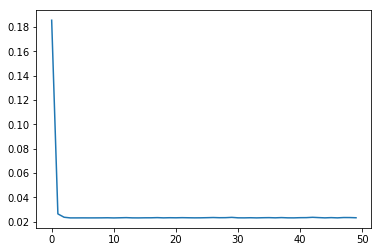

In [8]:
# Build model
model = Sequential()
model.add(Dense(1, input_shape=(s, ), use_bias=False))
opt = keras.optimizers.Adam(lr=0.04, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0003)
model.compile(optimizer=opt,
      loss='mean_squared_error',
      metrics=['mae'])

# Start training
history = model.fit(x_normalized, y_normalized, epochs=50, batch_size=20, verbose=1)

print(model.summary())
open("model", "w").write(model.to_json())
model.save_weights('param.hdf5')

weights = model.get_weights()
print(weights)

# plot loss 損失値の推移をプロット
plt.plot(history.history['loss'])
plt.show()

0     0.816057
1     0.738647
2     0.606630
3     0.616976
4     0.544932
5     0.493581
6     0.499329
7     0.438781
8     0.435907
9     0.491665
10    0.558153
Name: RM, dtype: float64
[[0.60828036]
 [0.55058014]
 [0.45217553]
 [0.45988795]
 [0.40618676]
 [0.36791036]
 [0.37219504]
 [0.32706317]
 [0.32492083]
 [0.36648214]
 [0.4160415 ]]
Predicted Price
[[32.372616]
 [29.776106]
 [25.347898]
 [25.694958]
 [23.278404]
 [21.555965]
 [21.748777]
 [19.717842]
 [19.621437]
 [21.491695]
 [23.721867]]
0.7453898


<Figure size 432x288 with 0 Axes>

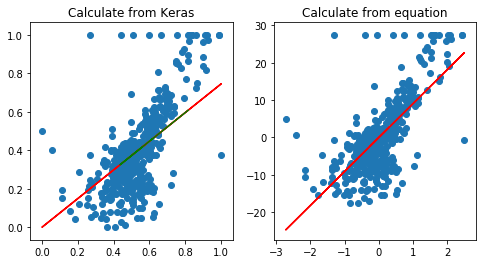

In [9]:
from keras.models import model_from_json

# Input Test Data
df_test = pandas.read_csv("test.csv")

x_test = df_test['RM'] - dataset_mean['RM']

x_test_normalized =  (x_test - min(x))/(max(x)-min(x))

# Load weights
model = model_from_json(open('model', 'r').read())
model.load_weights('param.hdf5')

# Prediction
test = model.predict(x_test_normalized)
print(x_test_normalized)
print(test)
# Real Price Result
print("Predicted Price")
print(min(y)+test*(max(y) - min(y)) + dataset_mean['Price'])

a_keras = weights[0][0][0]
print(a_keras)
plt.subplots_adjust(wspace=1.0, hspace=0.5)

plt.figure(figsize=(8, 4)) 

# Calculate from Keras

plt.subplot(1,2,1)
plt.title("Calculate from Keras")
plt.scatter(x_normalized, y_normalized)
plt.plot(x_normalized, a_keras*x_normalized, color='red')

plt.plot(x_test_normalized, test, color='green')

# Calculate from equation
plt.subplot(1,2,2)
plt.title("Calculate from equation")
plt.plot(x,a*x, label='y_hat', color='red')
plt.scatter(x,y, label='y')
plt.show()

緑でプロットした点は住宅価格データセットのRMの98~108番目を今回作成した単回帰分析のモデルに入力して推測させた結果です。直線のモデルなので、直線上で推測されているのがわかります。
ちなみにKerasを使うときにデータを0から1のレンジにしていますが、普通に入力すると学習できないですので、注意（このノートブックのやり方では学習できないです）。よってaの値も見かけは式で計算したときと大きく異なりますが、データにはどちらも同様にフィッティングしているのではないでしょうか。

# 参考ページ
https://matplotlib.org/  
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplot.html  
https://pandas.pydata.org/pandas-docs/stable/reference/frame.html  
https://scikit-learn.org/stable/  
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston  
https://seaborn.pydata.org/  
https://keras.rstudio.com/articles/tutorial_basic_regression.html  
https://www.kaggle.com/xgdbigdata/keras-regression-tutorial  
https://github.com/KatsuhiroMorishita/machine_leaning_samples  
https://www.udemy.com/course/kikagaku_blackbox_1/learn/lecture/8258758#overview  